# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [2]:
import re

test_text = '''Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.

Ugh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork belly retro Vice skateboard DIY Marfa. Mustache supertaxidermy cliche 9999 fashion axe Pitchfork, iPhone cred literally McSweeney's normcore. Health goth meggings skateboard 90's 3 wolf moon, PBR&B kale chips biodiesel fashion axe. Sartorial crucifix retro, four dollar toast kogi forage swag deep v wayfarers tilde.

Synth typewriter messenger bag health goth scenester pour-over. Pour-over Truffaut 90's fashion axe post-ironic, Portland Wes Anderson forage occupy sartorial gentrify hashtag beard kitsch quinoa. Occupy [[hashtag]] street art 3 wolf moon, Echo Park quinoa Tumblr Pitchfork fanny pack High Life. Helvetica banjo gentrify authentic mumblecore, tote bag blog. Scenester +1 American Apparel organic literally, Intelligentsia butcher bitters. Seitan lumbersexual fanny pack organic, letterpress umami ethical wayfarers. Cronut biodiesel Wes Anderson, jean shorts lo-fi keffiyeh Carles.

Bushwick health goth chambray gluten-free distillery. Keytar selvage Shoreditch, seitan YOLO tote bag listicle Marfa farm-to-table keffiyeh meditation tilde. Narwhal freegan meditation, Pitchfork XOXO Brooklyn 23456 whatever photo booth pork belly Blue Bottle gluten-free. Semiotics fashion axe 3 wolf moon, selfies brunch skateboard shabby chic organic wayfarers yr whatever kitsch Thundercats tilde bespoke. [[Bicycle|Bicycle(two-wheeled type)]] rights seitan mlkshk Marfa, church-key cray mustache sartorial banh mi food truck chillwave Echo Park bitters. Craft superbeer bespoke street art, slow-carb pop-up Kickstarter typewriter Etsy try-hard [[Pitchfork|Pitchfork Magazine]] aesthetic keytar Tumblr. 8-bit bitters fanny pack, Portland Odd Future yr selvage crucifix narwhal polaroid sriracha Thundercats.'''

four_digit_numbers = re.findall(r'\b\d{4}\b', test_text)
print(four_digit_numbers)

['1234', '9999']


In [7]:
super_words = re.findall(r'\bsuper\w*', test_text, re.IGNORECASE)
print(super_words)

['superpolaroid', 'supertaxidermy', 'superbeer']


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

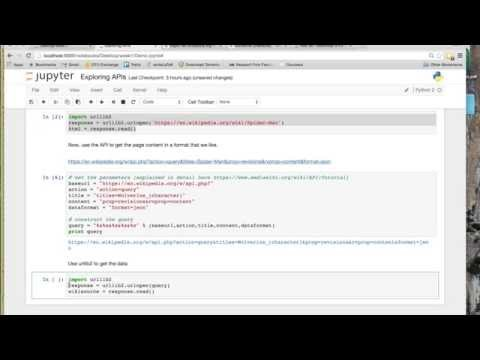

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the rock performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [ ]:
import re
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (compatible; MyDataScienceBot/1.0; +https://github.com/yourusername)"
}
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers"

# Fetch the HTML
response = requests.get(url, headers=headers)
html = response.text

# Regex to match artist links in the list
pattern = re.compile(r'<li>\s*<a\s+href="(/wiki/[^"]+)"[^>]*>([^<]+)</a>')

# Extract all matches
matches = pattern.findall(html)

# Convert relative links to full URLs
artist_links = ["https://en.wikipedia.org" + link for link, name in matches]

# Append to file (one per line)
with open("rock_performers_cleaned.txt", "a", encoding="utf-8") as f:
    for link in artist_links:
        f.write(link + "\n")

print(f"✅ Saved {len(artist_links)} links to rock_performers_urls.txt")

✅ Saved 492 links to rock_performers_cleaned.txt


In [14]:
import os
import requests
from tqdm import tqdm

# Ensure the 'content' directory exists
os.makedirs('content', exist_ok=True)

# Read all performer URLs from the file
with open('rock_performers_urls.txt', 'r', encoding='utf-8') as f:
    urls = [line.strip() for line in f if line.strip()]

headers = {
    "User-Agent": "Mozilla/5.0 (compatible; MyDataScienceBot/1.0; +https://github.com/yourusername)"
}

for url in tqdm(urls):
    filename = url.split('/')[-1] + '.txt'
    filepath = os.path.join('content', filename)
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        with open(filepath, 'w', encoding='utf-8') as out_file:
            out_file.write(response.text)
    except Exception as e:
        print(f"Failed to fetch {url}: {e}")

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [ ]:
import os
import re
import networkx as nx
from bs4 import BeautifulSoup
from urllib.parse import unquote
import glob
from tqdm import tqdm

def load_rock_performers_urls(filepath):
    """Load the list of valid rock performer URLs from file."""
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            urls = set(line.strip() for line in f if line.strip())
        return urls
    except FileNotFoundError:
        print(f"Warning: {filepath} not found. No URL filtering will be applied.")
        return set()

def extract_wikipedia_urls(html_content):
    """Extract all Wikipedia URLs from HTML content."""
    soup = BeautifulSoup(html_content, 'html.parser')
    urls = set()
    
    # Find all links to Wikipedia articles
    for link in soup.find_all('a', href=True):
        href = link['href']
        
        # Match Wikipedia article links (both relative and absolute)
        if '/wiki/' in href:
            # Handle relative URLs
            if href.startswith('/wiki/'):
                full_url = 'https://en.wikipedia.org' + href
            # Handle absolute URLs
            elif 'en.wikipedia.org/wiki/' in href:
                full_url = href
            else:
                continue
            
            # Remove fragment identifiers (#section)
            if '#' in full_url:
                full_url = full_url.split('#')[0]
            
            # Skip special pages
            if any(skip in full_url for skip in [
                'File:', 'Category:', 'Template:', 'Help:', 
                'Wikipedia:', 'Special:', 'Talk:', 'User:'
            ]):
                continue
                
            urls.add(full_url)
    
    return urls

def get_plain_text_word_count(html_content):
    """Extract plain text from HTML and count words."""
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Remove script and style elements
    for script in soup(["script", "style"]):
        script.decompose()
    
    # Get text and clean it up
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = ' '.join(chunk for chunk in chunks if chunk)
    
    # Count words
    words = text.split()
    return len(words)

def build_wikipedia_network(content_folder, rock_performers_file):
    """Build a NetworkX directed graph from Wikipedia HTML files."""
    
    # Load the list of valid rock performer URLs
    valid_urls = load_rock_performers_urls(rock_performers_file)
    print(f"Loaded {len(valid_urls)} valid URLs from {rock_performers_file}")
    
    # Initialize the graph
    G = nx.DiGraph()
    
    # Get all .txt files in the content folder
    txt_files = glob.glob(os.path.join(content_folder, '*.txt'))
    print(f"Found {len(txt_files)} .txt files in {content_folder}")
    
    # Dictionary to store extracted URLs for each file
    file_urls = {}
    
    # Process each file
    for filepath in tqdm(txt_files):
        filename = os.path.basename(filepath)
        node_name = os.path.splitext(filename)[0]  # Remove .txt extension
        
        try:
            # Read HTML content
            with open(filepath, 'r', encoding='utf-8') as f:
                html_content = f.read()
            
            # Extract URLs
            urls = extract_wikipedia_urls(html_content)
            
            # Filter URLs to keep only those in rock_performers_urls.txt
            if valid_urls:
                filtered_urls = urls.intersection(valid_urls)
            else:
                filtered_urls = urls
            
            file_urls[node_name] = filtered_urls
            
            # Get word count
            word_count = get_plain_text_word_count(html_content)
            
            # Add node to graph with word count attribute
            G.add_node(node_name, word_count=word_count)
            
            # print(f"Processed {filename}: {len(urls)} total URLs, {len(filtered_urls)} filtered URLs, {word_count} words", end='\r')
            
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            continue
    
    # Build edges based on URL connections
    print("\nBuilding edges...")
    edge_count = 0
    
    for source_node, source_urls in file_urls.items():
        for target_node in file_urls.keys():
            if source_node != target_node:
                # Check if target node's Wikipedia URL is in source node's URLs
                target_wiki_url = f"https://en.wikipedia.org/wiki/{target_node}"
                
                if target_wiki_url in source_urls:
                    G.add_edge(source_node, target_node)
                    edge_count += 1
                    print(f"Added edge: {source_node} -> {target_node}")
    
    print(f"\nGraph built successfully!")
    print(f"Nodes: {G.number_of_nodes()}")
    print(f"Edges: {G.number_of_edges()}")
    
    return G

def analyze_graph(G):
    """Print basic graph statistics."""
    print("\n=== Graph Analysis ===")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph density: {nx.density(G):.4f}")
    
    if G.number_of_nodes() > 0:
        # Top nodes by word count
        word_counts = nx.get_node_attributes(G, 'word_count')
        if word_counts:
            top_by_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:5]
            print(f"\nTop 5 nodes by word count:")
            for node, count in top_by_words:
                print(f"  {node}: {count:,} words")
        
        # Top nodes by in-degree (most referenced)
        in_degrees = dict(G.in_degree())
        if in_degrees:
            top_by_indegree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
            print(f"\nTop 5 most referenced nodes:")
            for node, degree in top_by_indegree:
                print(f"  {node}: {degree} incoming links")
        
        # Top nodes by out-degree (most references to others)
        out_degrees = dict(G.out_degree())
        if out_degrees:
            top_by_outdegree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
            print(f"\nTop 5 nodes with most outgoing links:")
            for node, degree in top_by_outdegree:
                print(f"  {node}: {degree} outgoing links")

# Usage example

content_folder = "content"  # Adjust path as needed
rock_performers_file = "rock_performers_urls.txt"  # Adjust path as needed

# Build the graph
graph = build_wikipedia_network(content_folder, rock_performers_file)

# Analyze the graph
analyze_graph(graph)

# Optionally save the graph
# nx.write_gexf(graph, "wikipedia_network.gexf")  # For Gephi
# nx.write_graphml(graph, "wikipedia_network.graphml")  # For other tools

print(f"\nExample of accessing node attributes:")
if graph.number_of_nodes() > 0:
    sample_node = list(graph.nodes())[0]
    word_count = graph.nodes[sample_node].get('word_count', 0)
    print(f"Node '{sample_node}' has {word_count:,} words")
    
    if graph.number_of_edges() > 0:
        print(f"\nExample edges:")
        for i, (source, target) in enumerate(graph.edges()):
            print(f"  {source} -> {target}")
            if i >= 4:  # Show only first 5 edges
                break

            
nx.write_graphml(graph, "rock_performers_graph.graphml")
nx.write_gexf(graph, "rock_performers_graph.gexf")

Loaded 492 valid URLs from rock_performers_urls.txt
Found 492 .txt files in content


100%|██████████| 492/492 [01:18<00:00,  6.27it/s]


Building edges...
Added edge: Funkadelic -> Cream_(band)
Added edge: Funkadelic -> Jimi_Hendrix
Added edge: Funkadelic -> Parliament-Funkadelic
Added edge: Funkadelic -> Parliament_(band)
Added edge: Funkadelic -> Sly_and_the_Family_Stone
Added edge: Slayer -> Ted_Nugent
Added edge: Slayer -> Ghost_(Swedish_band)
Added edge: Slayer -> Kiss_(band)
Added edge: Slayer -> Korn
Added edge: Slayer -> Lamb_of_God_(band)
Added edge: Slayer -> Black_Sabbath
Added edge: Slayer -> Ozzy_Osbourne
Added edge: Slayer -> Van_Halen
Added edge: Slayer -> Judas_Priest
Added edge: Slayer -> Tenacious_D
Added edge: Slayer -> Avenged_Sevenfold
Added edge: Slayer -> Bullet_for_My_Valentine
Added edge: Slayer -> Deftones
Added edge: Slayer -> Anthrax_(American_band)
Added edge: Slayer -> Trivium_(band)
Added edge: Slayer -> Rush_(band)
Added edge: Slayer -> Nine_Inch_Nails
Added edge: Slayer -> Aerosmith
Added edge: Slayer -> Primus_(band)
Added edge: Slayer -> Metallica
Added edge: Slayer -> Lacuna_Coil
Add

In [4]:
analyze_graph(graph)


=== Graph Analysis ===
Number of nodes: 492
Number of edges: 13695
Graph density: 0.0567

Top 5 nodes by word count:
  Bob_Dylan: 37,016 words
  Paul_McCartney: 36,501 words
  The_Beatles: 36,417 words
  Guns_N%27_Roses: 35,305 words
  Elton_John: 33,898 words

Top 5 most referenced nodes:
  The_Beatles: 219 incoming links
  Led_Zeppelin: 161 incoming links
  The_Rolling_Stones: 157 incoming links
  U2: 143 incoming links
  David_Bowie: 135 incoming links

Top 5 nodes with most outgoing links:
  The_Beatles: 124 outgoing links
  Coldplay: 117 outgoing links
  Red_Hot_Chili_Peppers: 109 outgoing links
  Aerosmith: 104 outgoing links
  Green_Day: 102 outgoing links


*Excercise*: Explain your process in words

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns

def analyze_network(G):
    """
    Comprehensive network analysis for a given NetworkX graph
    """
    print("=" * 60)
    print("NETWORK STATISTICS AND ANALYSIS")
    print("=" * 60)
    
    # 1. Basic network statistics
    print("\n1. BASIC NETWORK STATISTICS:")
    print("-" * 40)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of links (edges): {num_edges}")
    print(f"Graph density: {nx.density(G):.4f}")
    
    # 2. Degree distributions
    print("\n2. DEGREE ANALYSIS:")
    print("-" * 40)
    
    # Calculate degrees
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    # Basic degree statistics
    in_degree_values = list(in_degrees.values())
    out_degree_values = list(out_degrees.values())
    
    print(f"In-degree - Mean: {np.mean(in_degree_values):.2f}, "
          f"Std: {np.std(in_degree_values):.2f}, "
          f"Max: {max(in_degree_values)}")
    print(f"Out-degree - Mean: {np.mean(out_degree_values):.2f}, "
           f"Std: {np.std(out_degree_values):.2f}, "
           f"Max: {max(out_degree_values)}")
    
    # 3. Plot degree distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Degree Distribution Analysis', fontsize=16, fontweight='bold')
    
    # In-degree distribution
    in_degree_counts = Counter(in_degree_values)
    degrees_in, counts_in = zip(*sorted(in_degree_counts.items()))
    axes[0,0].bar(degrees_in, counts_in, alpha=0.7, color='blue')
    axes[0,0].set_xlabel('In-Degree')
    axes[0,0].set_ylabel('Number of Nodes')
    axes[0,0].set_title('In-Degree Distribution')
    axes[0,0].grid(True, alpha=0.3)
    
    # Out-degree distribution
    out_degree_counts = Counter(out_degree_values)
    degrees_out, counts_out = zip(*sorted(out_degree_counts.items()))
    axes[0,1].bar(degrees_out, counts_out, alpha=0.7, color='red')
    axes[0,1].set_xlabel('Out-Degree')
    axes[0,1].set_ylabel('Number of Nodes')
    axes[0,1].set_title('Out-Degree Distribution')
    axes[0,1].grid(True, alpha=0.3)
    
    # Log-log plots for better visualization of heavy tails
    axes[1,0].loglog(degrees_in, counts_in, 'bo-', alpha=0.7)
    axes[1,0].set_xlabel('In-Degree (log scale)')
    axes[1,0].set_ylabel('Number of Nodes (log scale)')
    axes[1,0].set_title('In-Degree Distribution (Log-Log)')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].loglog(degrees_out, counts_out, 'ro-', alpha=0.7)
    axes[1,1].set_xlabel('Out-Degree (log scale)')
    axes[1,1].set_ylabel('Number of Nodes (log scale)')
    axes[1,1].set_title('Out-Degree Distribution (Log-Log)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Compare with random network (out-degree)
    print("\n3. COMPARISON WITH RANDOM NETWORK:")
    print("-" * 40)
    
    # Create Erdős–Rényi random graph with same nodes and approximate same edges
    p = num_edges / (num_nodes * (num_nodes - 1))  # probability for random graph
    G_random = nx.erdos_renyi_graph(num_nodes, p, directed=True)
    
    random_out_degrees = list(dict(G_random.out_degree()).values())
    random_out_counts = Counter(random_out_degrees)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(degrees_out, counts_out, alpha=0.7, color='red', label='Original Network')
    if random_out_counts:
        r_degrees, r_counts = zip(*sorted(random_out_counts.items()))
        plt.bar(r_degrees, r_counts, alpha=0.5, color='gray', label='Random Network')
    plt.xlabel('Out-Degree')
    plt.ylabel('Number of Nodes')
    plt.title('Out-Degree: Original vs Random Network')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(out_degree_values, bins=20, alpha=0.7, color='red', label='Original', density=True)
    plt.hist(random_out_degrees, bins=20, alpha=0.5, color='gray', label='Random', density=True)
    plt.xlabel('Out-Degree')
    plt.ylabel('Density')
    plt.title('Out-Degree Distribution Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original network - Out-degree mean: {np.mean(out_degree_values):.2f}")
    print(f"Random network - Out-degree mean: {np.mean(random_out_degrees):.2f}")
    
    # 5. Compare with scale-free network (in-degree)
    print("\n4. COMPARISON WITH SCALE-FREE NETWORK:")
    print("-" * 40)
    
    # Create Barabási–Albert scale-free graph
    m = max(1, num_edges // num_nodes)  # average degree
    G_scalefree = nx.barabasi_albert_graph(num_nodes, m)
    G_scalefree_directed = G_scalefree.to_directed()
    
    scalefree_in_degrees = list(dict(G_scalefree_directed.in_degree()).values())
    scalefree_in_counts = Counter(scalefree_in_degrees)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(degrees_in, counts_in, alpha=0.7, color='blue', label='Original Network')
    if scalefree_in_counts:
        sf_degrees, sf_counts = zip(*sorted(scalefree_in_counts.items()))
        plt.bar(sf_degrees, sf_counts, alpha=0.5, color='green', label='Scale-free Network')
    plt.xlabel('In-Degree')
    plt.ylabel('Number of Nodes')
    plt.title('In-Degree: Original vs Scale-free Network')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.loglog(degrees_in, counts_in, 'bo-', alpha=0.7, label='Original')
    if scalefree_in_counts:
        plt.loglog(sf_degrees, sf_counts, 'go-', alpha=0.7, label='Scale-free')
    plt.xlabel('In-Degree (log scale)')
    plt.ylabel('Count (log scale)')
    plt.title('In-Degree Distribution (Log-Log)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original network - In-degree mean: {np.mean(in_degree_values):.2f}")
    print(f"Scale-free network - In-degree mean: {np.mean(scalefree_in_degrees):.2f}")
    
    # 6. Top connected nodes
    print("\n5. TOP CONNECTED NODES:")
    print("-" * 40)
    
    # Top 5 by in-degree
    top_in_degree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 nodes by IN-DEGREE:")
    for i, (node, degree) in enumerate(top_in_degree, 1):
        print(f"  {i}. Node '{node}': {degree} incoming connections")
    
    print()
    
    # Top 5 by out-degree
    top_out_degree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 nodes by OUT-DEGREE:")
    for i, (node, degree) in enumerate(top_out_degree, 1):
        print(f"  {i}. Node '{node}': {degree} outgoing connections")
    
    # 7. Content length analysis (if available)
    print("\n6. CONTENT LENGTH ANALYSIS:")
    print("-" * 40)
    
    # Check if nodes have 'length of content' attribute
    content_lengths = {}
    for node in G.nodes():
        # Try different possible attribute names
        for attr in ['word_count']:
            if attr in G.nodes[node]:
                content_lengths[node] = G.nodes[node][attr]
                break
    
    if content_lengths:
        top_content = sorted(content_lengths.items(), key=lambda x: x[1], reverse=True)[:10]
        print("Top 10 nodes by CONTENT LENGTH:")
        for i, (node, length) in enumerate(top_content, 1):
            print(f"  {i}. Node '{node}': {length} characters/units")
    else:
        print("No 'length of content' attribute found in node data.")
        print("Available node attributes:", 
              list(G.nodes[list(G.nodes())[0]].keys()) if G.nodes() else "None")
    
    # 8. Analysis observations
    print("\n7. KEY OBSERVATIONS:")
    print("-" * 40)
    print("• In-degree vs Out-degree differences:")
    print(f"  - In-degree variance: {np.var(in_degree_values):.2f}")
    print(f"  - Out-degree variance: {np.var(out_degree_values):.2f}")
    
    # Check for heavy-tailed distributions
    in_gini = calculate_gini_coefficient(in_degree_values)
    out_gini = calculate_gini_coefficient(out_degree_values)
    print(f"  - In-degree Gini coefficient: {in_gini:.3f}")
    print(f"  - Out-degree Gini coefficient: {out_gini:.3f}")
    print("  (Higher Gini = more unequal distribution)")
    
    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'in_degrees': in_degrees,
        'out_degrees': out_degrees,
        'top_in_degree': top_in_degree,
        'top_out_degree': top_out_degree,
        'content_lengths': content_lengths
    }

def calculate_gini_coefficient(values):
    """Calculate Gini coefficient for inequality measurement"""
    values = sorted(values)
    n = len(values)
    if n == 0:
        return 0
    cumsum = np.cumsum(values)
    return (n + 1 - 2 * sum((n + 1 - i) * y for i, y in enumerate(values, 1)) / cumsum[-1]) / n


NETWORK STATISTICS AND ANALYSIS

1. BASIC NETWORK STATISTICS:
----------------------------------------
Number of nodes: 492
Number of links (edges): 13695
Graph density: 0.0567

2. DEGREE ANALYSIS:
----------------------------------------
In-degree - Mean: 27.84, Std: 29.85, Max: 219
Out-degree - Mean: 27.84, Std: 22.80, Max: 124


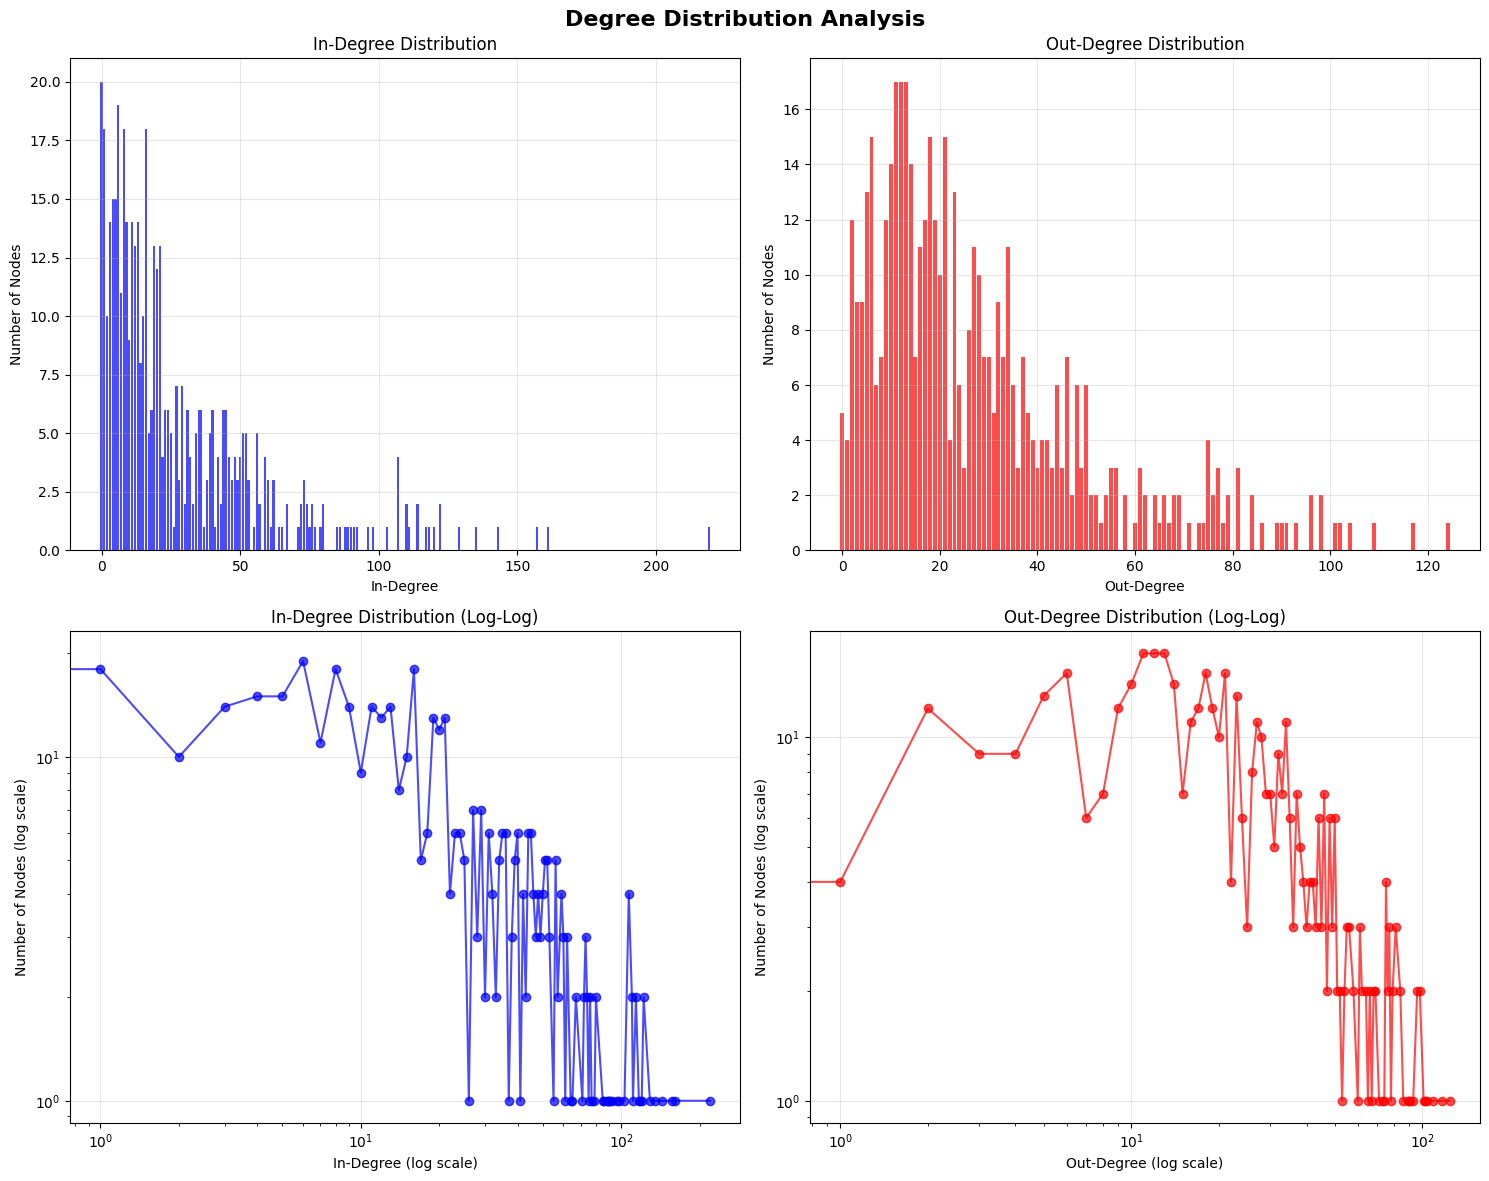


3. COMPARISON WITH RANDOM NETWORK:
----------------------------------------


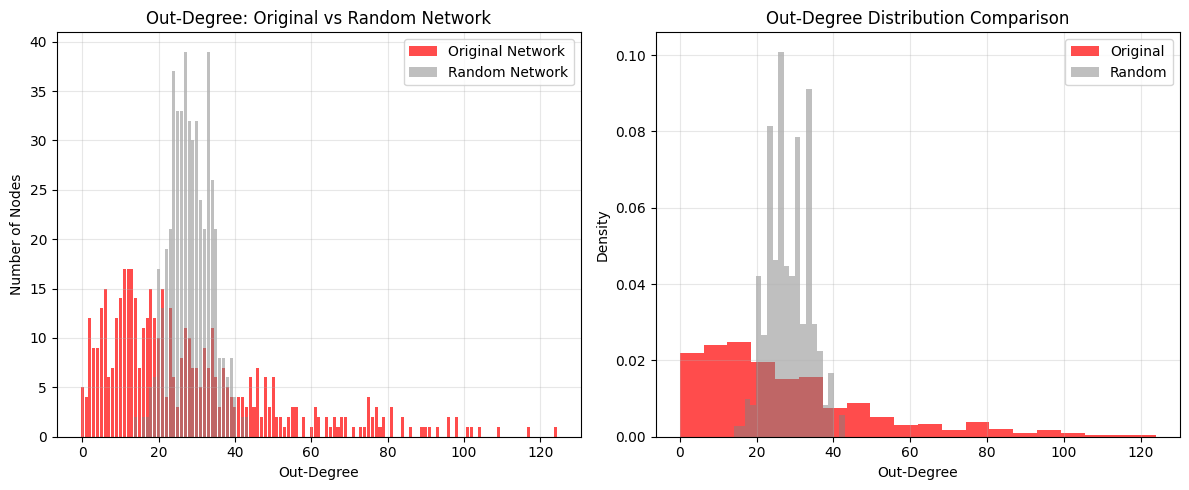

Original network - Out-degree mean: 27.84
Random network - Out-degree mean: 28.33

4. COMPARISON WITH SCALE-FREE NETWORK:
----------------------------------------


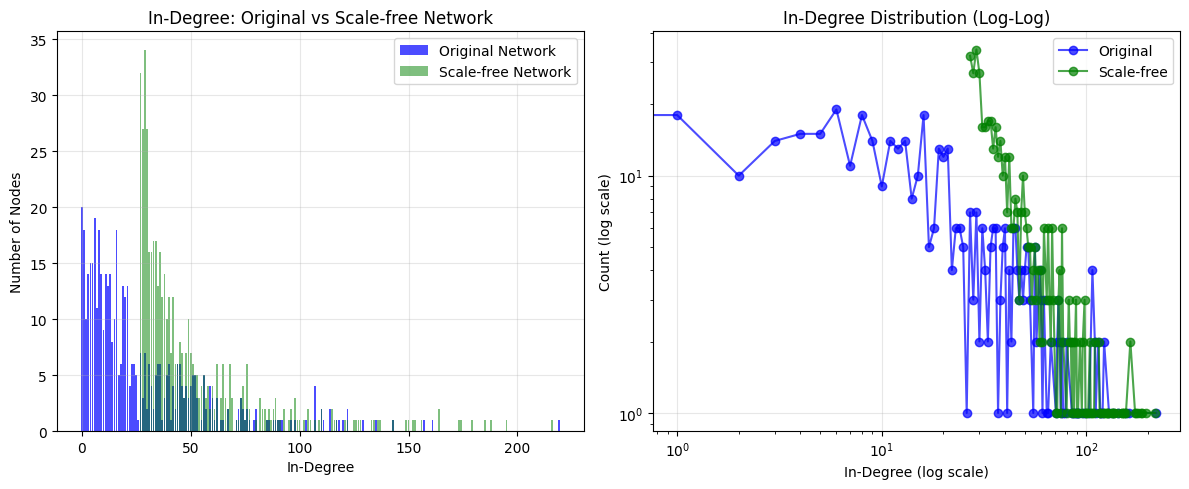

Original network - In-degree mean: 27.84
Scale-free network - In-degree mean: 51.04

5. TOP CONNECTED NODES:
----------------------------------------
Top 5 nodes by IN-DEGREE:
  1. Node 'The_Beatles': 219 incoming connections
  2. Node 'Led_Zeppelin': 161 incoming connections
  3. Node 'The_Rolling_Stones': 157 incoming connections
  4. Node 'U2': 143 incoming connections
  5. Node 'David_Bowie': 135 incoming connections

Top 5 nodes by OUT-DEGREE:
  1. Node 'The_Beatles': 124 outgoing connections
  2. Node 'Coldplay': 117 outgoing connections
  3. Node 'Red_Hot_Chili_Peppers': 109 outgoing connections
  4. Node 'Aerosmith': 104 outgoing connections
  5. Node 'Green_Day': 102 outgoing connections

6. CONTENT LENGTH ANALYSIS:
----------------------------------------
Top 10 nodes by CONTENT LENGTH:
  1. Node 'Bob_Dylan': 37016 characters/units
  2. Node 'Paul_McCartney': 36501 characters/units
  3. Node 'The_Beatles': 36417 characters/units
  4. Node 'Guns_N%27_Roses': 35305 characters/u

In [10]:
# Run the analysis
results = analyze_network(graph)

print(f"\n{'='*60}")
print("ANALYSIS COMPLETE")
print(f"{'='*60}")

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

NETWORK VISUALIZATION

1. Converting directed graph to undirected...
Original directed graph: 492 nodes, 13695 edges
Undirected graph: 492 nodes, 9340 edges

2. Preparing node attributes...
Degree range: 0 - 223
No content length attribute found. Generating random values for demonstration...
Content length range: 510 - 2993
Using attribute: 'generated_content_length'

3.1. Creating Spring Layout...

3.2. Creating Kamada-Kawai Layout...

3.3. Creating Circular Layout...

3.4. Creating Random Layout...


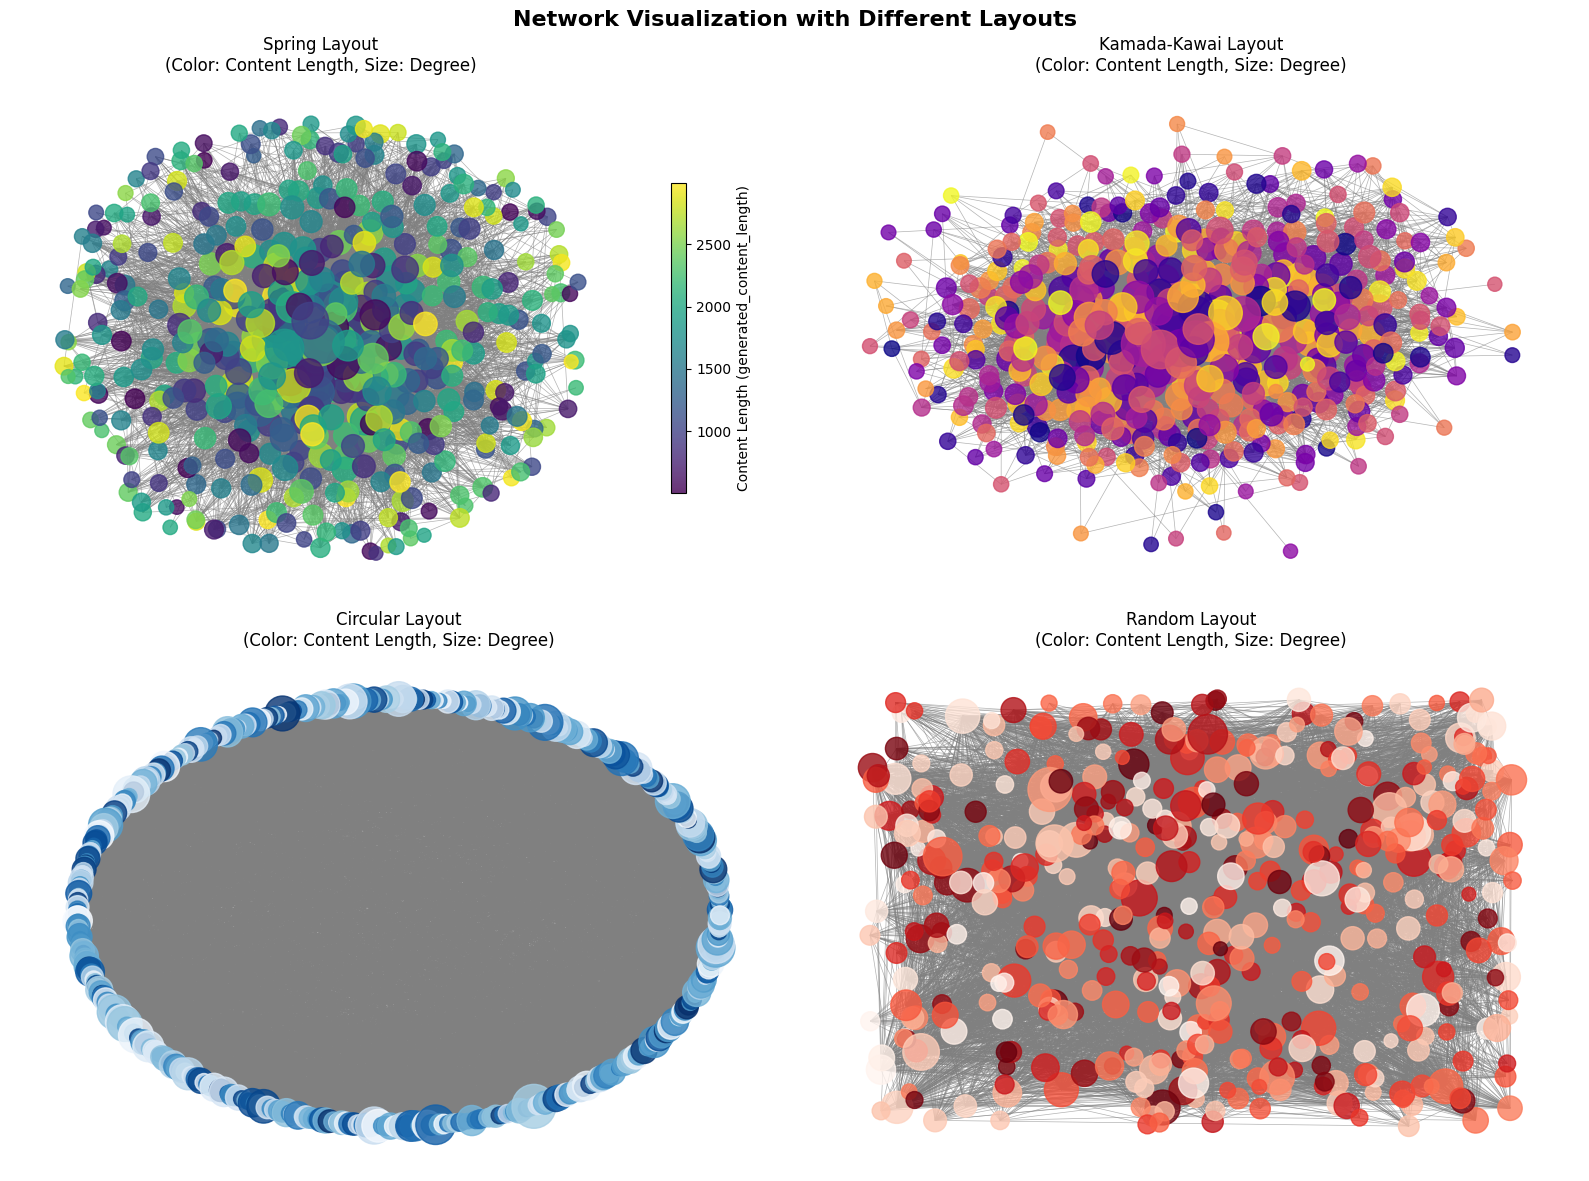


4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout


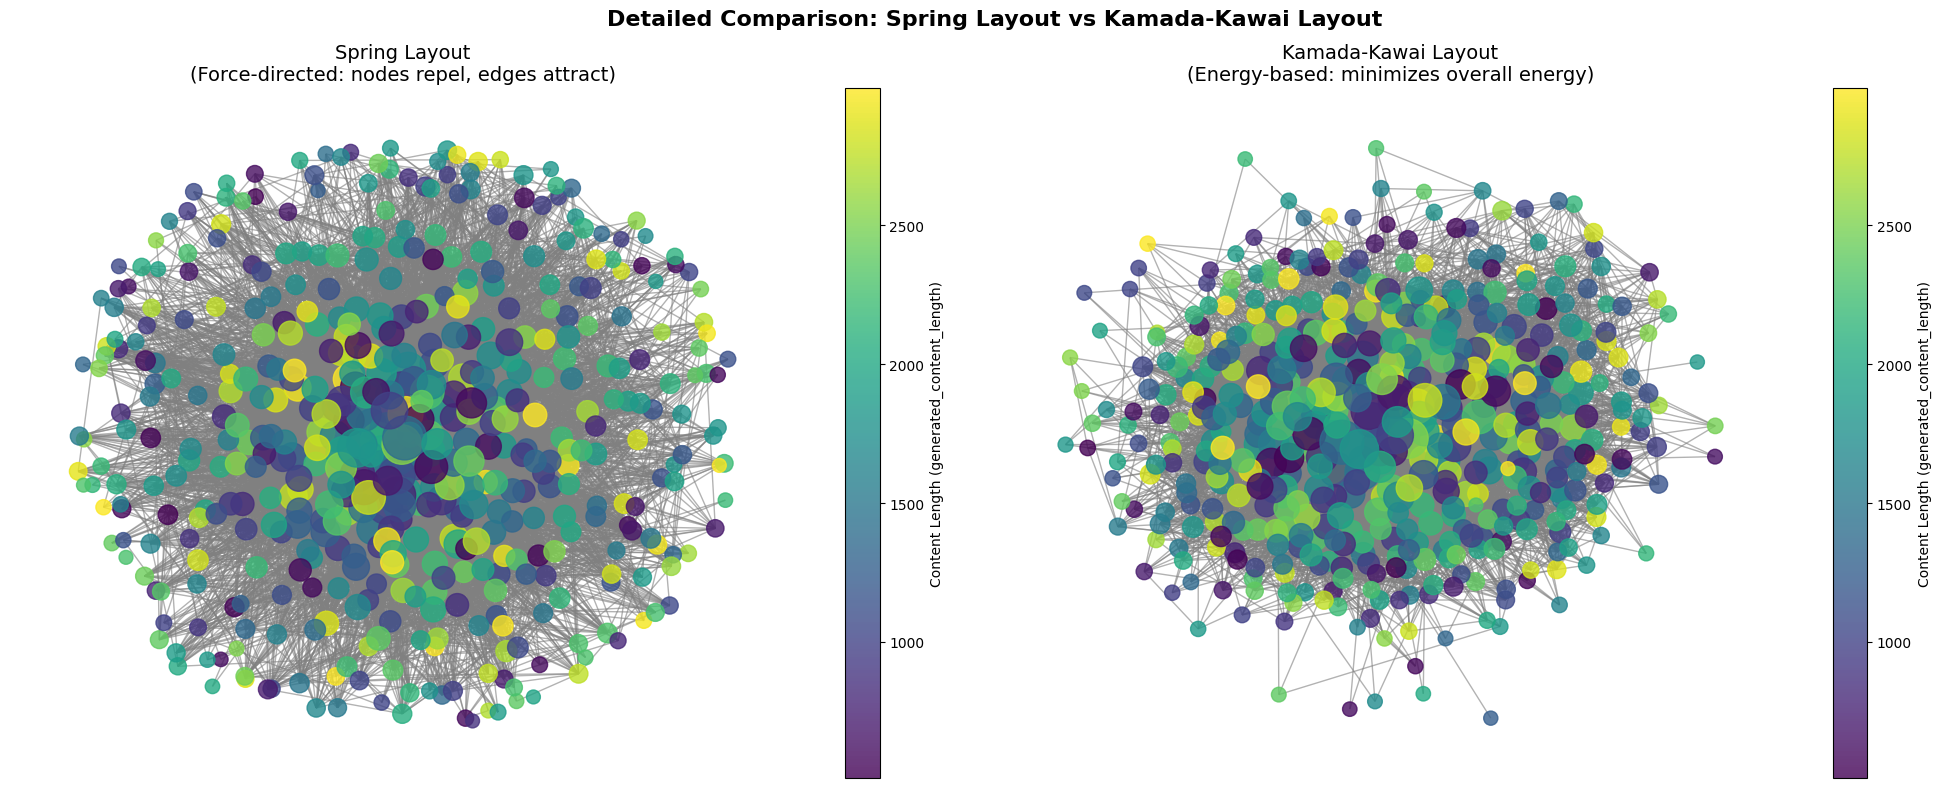


5. Creating size legend...


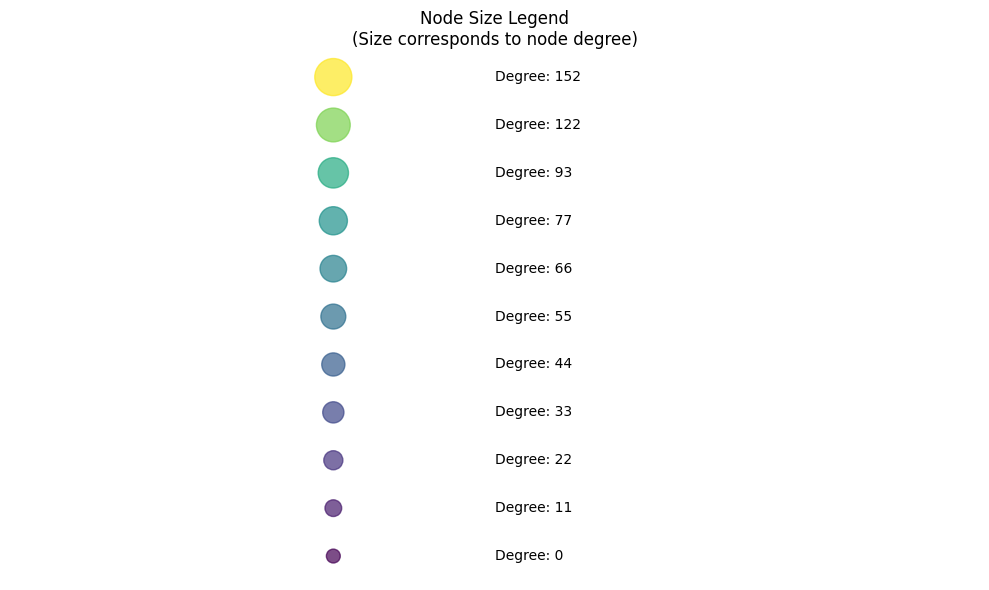


6. VISUALIZATION SUMMARY:
----------------------------------------
• Network converted from directed (13695 edges) to undirected (9340 edges)
• Node sizes scaled by degree (range: 0 - 223)
• Node colors based on 'generated_content_length' (range: 510 - 2993)
• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)

• Layout Algorithm Differences:
  - Spring Layout: Fast, good for most networks, emphasizes local structure
  - Kamada-Kawai: Slower but more stable, better for showing global structure
  - Circular: Good for showing all nodes clearly, less emphasis on connections
  - Random: Baseline comparison, no meaningful structure

ALTERNATIVE COLOR SCHEMES


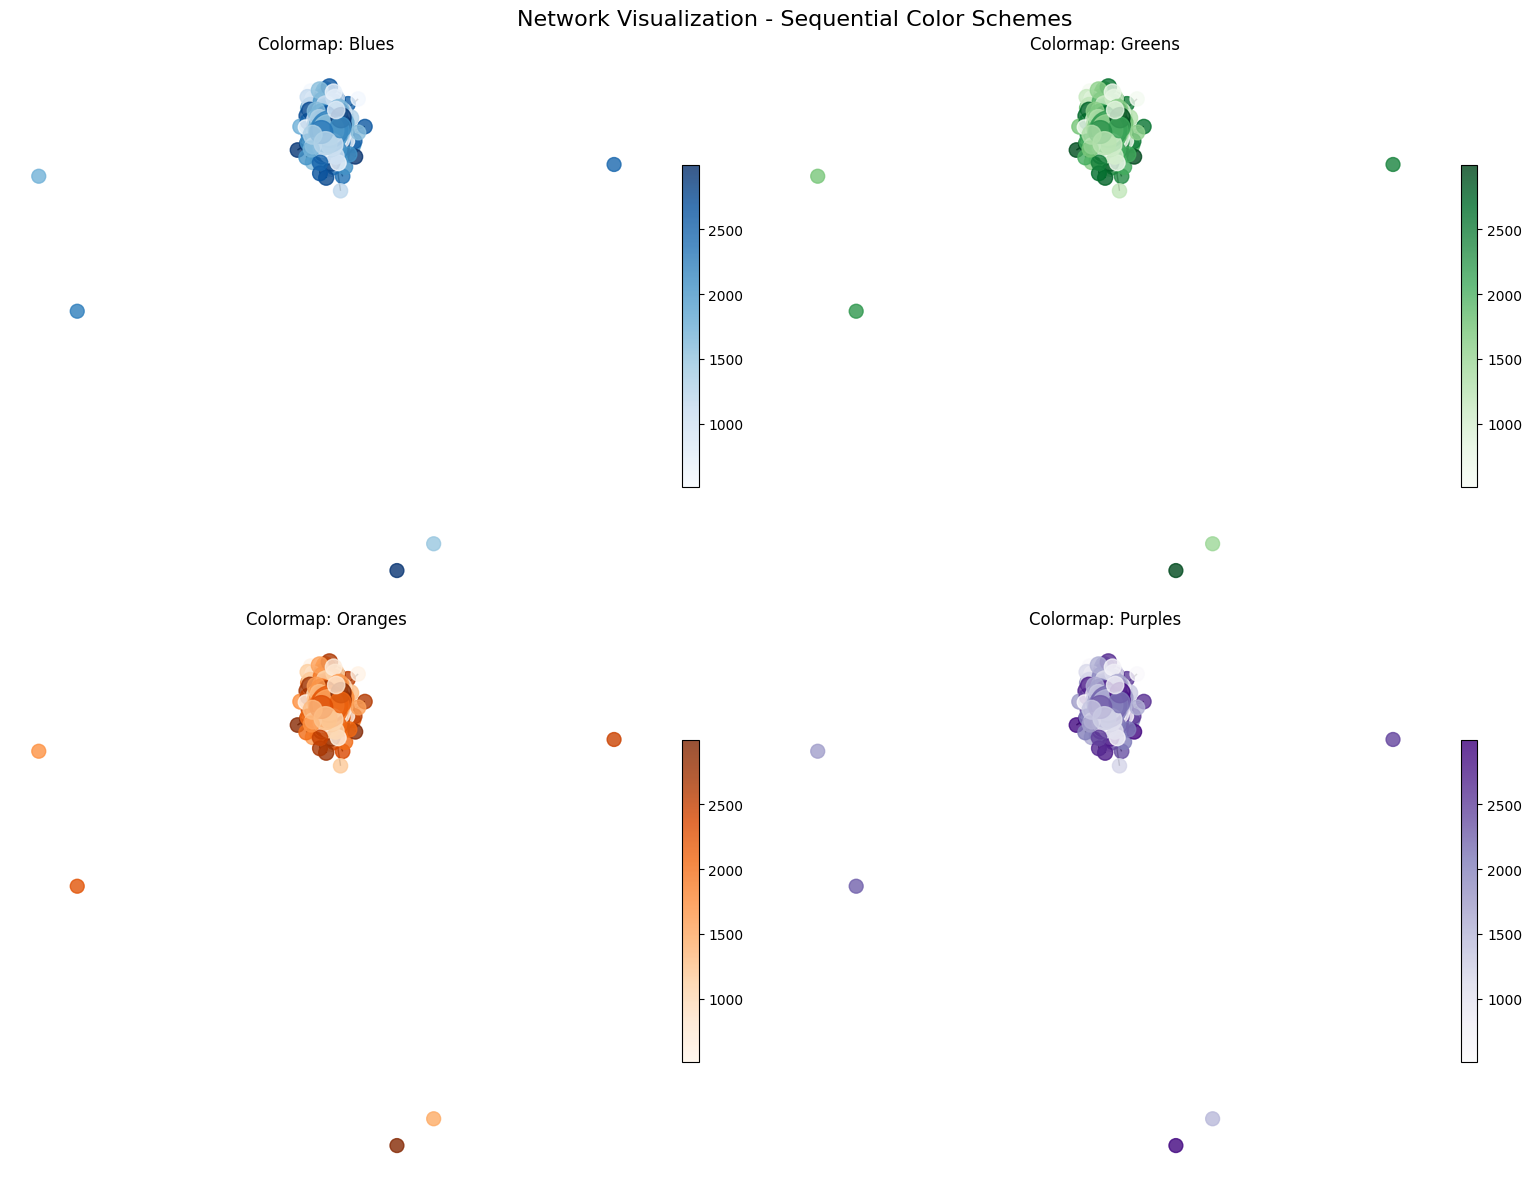


VISUALIZATION COMPLETE

Key Points:
• Directed graph preserved as G_directed
• Undirected version created for visualization
• Node size = degree, Node color = content length
• Multiple layout algorithms compared

To use with your graph:
G_undirected, pos = visualize_network(your_directed_graph)


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

def visualize_network(G_directed, figsize=(16, 12)):
    """
    Comprehensive network visualization with multiple layout algorithms
    
    Parameters:
    -----------
    G_directed : nx.DiGraph
        The original directed graph
    figsize : tuple
        Figure size for the plots
    """
    
    print("=" * 60)
    print("NETWORK VISUALIZATION")
    print("=" * 60)
    
    # 1. Convert directed graph to undirected
    print("\n1. Converting directed graph to undirected...")
    G_undirected = G_directed.to_undirected()
    
    print(f"Original directed graph: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")
    print(f"Undirected graph: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")
    
    # 2. Prepare node attributes for visualization
    print("\n2. Preparing node attributes...")
    
    # Calculate degrees for undirected graph
    degrees = dict(G_undirected.degree())
    print(f"Degree range: {min(degrees.values())} - {max(degrees.values())}")
    
    # Extract content length (try different possible attribute names)
    content_lengths = {}
    content_attr_name = None
    
    for attr in ['length of content', 'content_length', 'length', 'size', 'weight']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_attr_name = attr
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths or all(v == 0 for v in content_lengths.values()):
        # Generate random content lengths for demonstration
        print("No content length attribute found. Generating random values for demonstration...")
        content_lengths = {node: np.random.randint(500, 3000) 
                          for node in G_undirected.nodes()}
        content_attr_name = "generated_content_length"
    
    print(f"Content length range: {min(content_lengths.values())} - {max(content_lengths.values())}")
    print(f"Using attribute: '{content_attr_name}'")
    
    # 3. Prepare visualization parameters
    
    # Node sizes based on degree (scale appropriately)
    min_size = 100
    max_size = 1000
    degree_values = list(degrees.values())
    min_degree = min(degree_values)
    max_degree = max(degree_values)
    
    if max_degree == min_degree:
        node_sizes = [500 for _ in degree_values]  # All same size if all degrees equal
    else:
        node_sizes = [min_size + (max_size - min_size) * 
                     (degree - min_degree) / (max_degree - min_degree) 
                     for degree in degree_values]
    
    # Node colors based on content length
    content_values = list(content_lengths.values())
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Network Visualization with Different Layouts', fontsize=16, fontweight='bold')
    
    # Color schemes to try
    colormaps = ['viridis', 'plasma', 'Blues', 'Reds']
    layout_functions = [nx.spring_layout, nx.kamada_kawai_layout, nx.circular_layout, nx.random_layout]
    layout_names = ['Spring Layout', 'Kamada-Kawai Layout', 'Circular Layout', 'Random Layout']
    
    # Create visualizations
    for idx, (ax, cmap, layout_func, layout_name) in enumerate(zip(axes.flat, colormaps, layout_functions, layout_names)):
        
        print(f"\n3.{idx+1}. Creating {layout_name}...")
        
        try:
            # Calculate layout positions
            if layout_func == nx.kamada_kawai_layout:
                # Kamada-Kawai can be slow for large graphs, add parameters for efficiency
                if G_undirected.number_of_nodes() > 100:
                    pos = layout_func(G_undirected, scale=1.0)
                else:
                    pos = layout_func(G_undirected, scale=1.0)
            elif layout_func == nx.spring_layout:
                # Spring layout parameters for better results
                pos = layout_func(G_undirected, k=1, iterations=50, seed=42)
            else:
                pos = layout_func(G_undirected)
            
            # Draw the network
            nodes = nx.draw_networkx_nodes(
                G_undirected, pos,
                node_color=content_values,
                node_size=node_sizes,
                cmap=plt.cm.get_cmap(cmap),
                alpha=0.8,
                ax=ax
            )
            
            # Draw edges
            nx.draw_networkx_edges(
                G_undirected, pos,
                alpha=0.6,
                edge_color='gray',
                width=0.5,
                ax=ax
            )
            
            # Draw labels if not too many nodes
            if G_undirected.number_of_nodes() <= 20:
                nx.draw_networkx_labels(
                    G_undirected, pos,
                    font_size=8,
                    font_color='black',
                    font_weight='bold',
                    ax=ax
                )
            
            ax.set_title(f'{layout_name}\n(Color: Content Length, Size: Degree)', fontsize=12)
            ax.axis('off')
            
            # Add colorbar for the first plot
            if idx == 0:
                plt.colorbar(nodes, ax=ax, label=f'Content Length ({content_attr_name})', shrink=0.6)
        
        except Exception as e:
            ax.text(0.5, 0.5, f'Error with {layout_name}:\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{layout_name} (Error)')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Create detailed comparison of Spring vs Kamada-Kawai
    print("\n4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Detailed Comparison: Spring Layout vs Kamada-Kawai Layout', fontsize=16, fontweight='bold')
    
    # Spring Layout
    try:
        pos_spring = nx.spring_layout(G_undirected, k=1, iterations=50, seed=42)
        
        nodes1 = nx.draw_networkx_nodes(
            G_undirected, pos_spring,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax1
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_spring,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax1
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_spring,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax1
            )
        
        ax1.set_title('Spring Layout\n(Force-directed: nodes repel, edges attract)', fontsize=14)
        ax1.axis('off')
        
        # Add colorbar
        cbar1 = plt.colorbar(nodes1, ax=ax1, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax1.text(0.5, 0.5, f'Spring Layout Error:\n{str(e)}', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Spring Layout (Error)')
    
    # Kamada-Kawai Layout
    try:
        if G_undirected.number_of_nodes() > 100:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        else:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        
        nodes2 = nx.draw_networkx_nodes(
            G_undirected, pos_kk,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax2
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_kk,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax2
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_kk,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax2
            )
        
        ax2.set_title('Kamada-Kawai Layout\n(Energy-based: minimizes overall energy)', fontsize=14)
        ax2.axis('off')
        
        # Add colorbar
        cbar2 = plt.colorbar(nodes2, ax=ax2, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax2.text(0.5, 0.5, f'Kamada-Kawai Layout Error:\n{str(e)}', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Kamada-Kawai Layout (Error)')
    
    plt.tight_layout()
    plt.show()
    
    # 5. Create a size legend
    print("\n5. Creating size legend...")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create size legend
    unique_degrees = sorted(set(degrees.values()))
    if len(unique_degrees) > 10:
        # Show only a sample if too many unique degrees
        step = len(unique_degrees) // 10
        unique_degrees = unique_degrees[::step]
    
    legend_sizes = []
    for degree in unique_degrees:
        if max_degree == min_degree:
            size = 500
        else:
            size = min_size + (max_size - min_size) * (degree - min_degree) / (max_degree - min_degree)
        legend_sizes.append(size)
    
    # Plot legend
    y_positions = np.linspace(0, len(unique_degrees)-1, len(unique_degrees))
    scatter = ax.scatter(np.zeros(len(unique_degrees)), y_positions, 
                        s=legend_sizes, c=unique_degrees, cmap='viridis', alpha=0.7)
    
    # Add text labels
    for i, (degree, size) in enumerate(zip(unique_degrees, legend_sizes)):
        ax.text(0.5, i, f'Degree: {degree}', va='center', fontsize=10)
    
    ax.set_xlim(-1, 2)
    ax.set_ylim(-0.5, len(unique_degrees)-0.5)
    ax.set_ylabel('Node Examples')
    ax.set_title('Node Size Legend\n(Size corresponds to node degree)')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Print analysis summary
    print("\n6. VISUALIZATION SUMMARY:")
    print("-" * 40)
    print(f"• Network converted from directed ({G_directed.number_of_edges()} edges) "
          f"to undirected ({G_undirected.number_of_edges()} edges)")
    print(f"• Node sizes scaled by degree (range: {min_degree} - {max_degree})")
    print(f"• Node colors based on '{content_attr_name}' "
          f"(range: {min(content_values)} - {max(content_values)})")
    print(f"• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)")
    
    print("\n• Layout Algorithm Differences:")
    print("  - Spring Layout: Fast, good for most networks, emphasizes local structure")
    print("  - Kamada-Kawai: Slower but more stable, better for showing global structure")
    print("  - Circular: Good for showing all nodes clearly, less emphasis on connections")
    print("  - Random: Baseline comparison, no meaningful structure")
    
    return G_undirected, pos_spring if 'pos_spring' in locals() else None


# Alternative color schemes for different preferences
def visualize_with_custom_colors(G_directed, color_scheme='sequential'):
    """
    Create visualization with different color schemes
    
    Parameters:
    -----------
    G_directed : nx.DiGraph
        The original directed graph
    color_scheme : str
        'sequential', 'diverging', or 'qualitative'
    """
    
    G_undirected = G_directed.to_undirected()
    degrees = dict(G_undirected.degree())
    
    # Get content lengths
    content_lengths = {}
    for attr in ['length of content', 'content_length', 'length', 'size']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths:
        content_lengths = {node: np.random.randint(500, 3000) for node in G_undirected.nodes()}
    
    # Node sizes
    degree_values = list(degrees.values())
    min_degree, max_degree = min(degree_values), max(degree_values)
    if max_degree == min_degree:
        node_sizes = [500] * len(degree_values)
    else:
        node_sizes = [100 + 900 * (d - min_degree) / (max_degree - min_degree) for d in degree_values]
    
    content_values = list(content_lengths.values())
    
    # Choose colormap based on scheme
    if color_scheme == 'sequential':
        cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']
    elif color_scheme == 'diverging':
        cmaps = ['RdBu', 'RdYlBu', 'Spectral', 'coolwarm']
    else:  # qualitative
        cmaps = ['Set1', 'Set2', 'tab10', 'Pastel1']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Network Visualization - {color_scheme.title()} Color Schemes', fontsize=16)
    
    pos = nx.spring_layout(G_undirected, seed=42)
    
    for ax, cmap in zip(axes.flat, cmaps):
        nodes = nx.draw_networkx_nodes(
            G_undirected, pos, node_color=content_values, node_size=node_sizes,
            cmap=cmap, alpha=0.8, ax=ax
        )
        nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, ax=ax)
        
        if G_undirected.number_of_nodes() <= 20:
            nx.draw_networkx_labels(G_undirected, pos, font_size=8, ax=ax)
        
        ax.set_title(f'Colormap: {cmap}')
        ax.axis('off')
        plt.colorbar(nodes, ax=ax, shrink=0.6)
    
    plt.tight_layout()
    plt.show()


# Create or load your graph
G_directed = graph  # Use the previously created graph

# Run the main visualization
G_undirected, pos = visualize_network(G_directed)

# Show alternative color schemes
print("\n" + "="*60)
print("ALTERNATIVE COLOR SCHEMES")
print("="*60)

visualize_with_custom_colors(G_directed, 'sequential')

print(f"\n{'='*60}")
print("VISUALIZATION COMPLETE")
print(f"{'='*60}")
print("\nKey Points:")
print("• Directed graph preserved as G_directed")
print("• Undirected version created for visualization")
print("• Node size = degree, Node color = content length")
print("• Multiple layout algorithms compared")
print("\nTo use with your graph:")
print("G_undirected, pos = visualize_network(your_directed_graph)")